In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import math

# Read Data

In [3]:
data = pd.read_csv('./kc_house_data.csv', sep=',', header=0)
data.shape

(21613, 21)

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Get Feature and Labels

In [7]:
X = data[['bedrooms','bathrooms','sqft_living','floors']]
Y = data['price']
#to add: location variables

In [8]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=0)

xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

### EDA

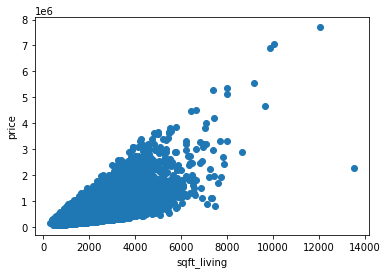

In [12]:
# price and sqft_living
plt.scatter(X['sqft_living'], Y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

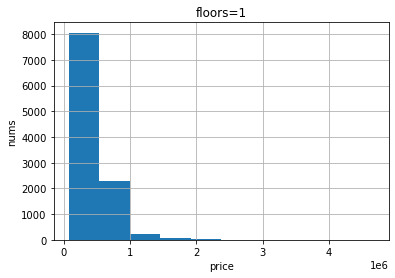

In [14]:
# price and floors
data[data['floors']==1]['price'].hist()
plt.xlabel('price')
plt.ylabel('nums')
plt.title('floors=1')
plt.show()

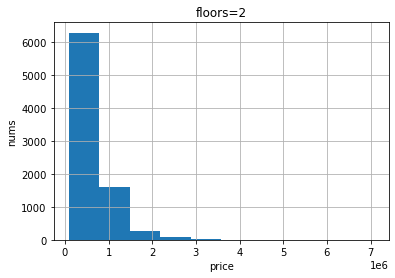

In [15]:
data[data['floors']==2]['price'].hist()
plt.xlabel('price')
plt.ylabel('nums')
plt.title('floors=2')
plt.show()

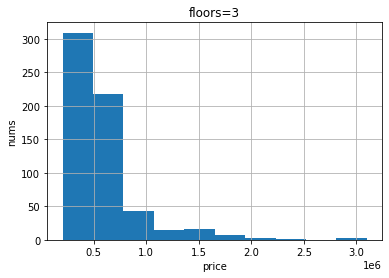

In [16]:
data[data['floors']==3]['price'].hist()
plt.xlabel('price')
plt.ylabel('nums')
plt.title('floors=3')
plt.show()

### Train Model

In [24]:
model = LinearRegression()
model.fit(xtrain, ytrain)

C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

In [29]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))
#all else equal, more bedrooms can drive down price

,0,1
0,bedrooms,-51118.881973
1,bathrooms,4146.343826
2,sqft_living,300.225555
3,floors,5226.700983


In [28]:
model.intercept_

71317.92892233701

### Test

In [32]:
model.predict([[3, 2, 1500, 2],[2, 1, 1000, 1]])

array([387045.70549733, 278678.76503588])

In [35]:
y_pred = model.predict(xtest)

C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [36]:
metrics.mean_squared_error(ytest, y_pred)

69651448893.86037

In [37]:
metrics.mean_absolute_error(ytest, y_pred)

168745.61761825735